# aim: To build an ML model and predict the probability that a member will default, of the bank Indessa.

Approach: Supervised ML - 
    Binary Classification [Default or Not Default] or Probabilistic Regression [Probability to Default = range(0, 1)]-Extensive Case

Selected Approach: Binary Classification [Default or Not Default]

Available Data: Train_indessa.csv => Split into Train and Test Datasets
                Test_indessa.csv => Eventually apply the model on this Dataset and return the submission.csv
                
Recommended ML Models (Supervised): 
    Decision Tree
    Random Forest
    Logistic Regression
    XGBoost
    SVM
    
Further Improvements: 
    Ensemble Models
    Neural Networks

__

Model Input: A bank member object (with a set of columns) 
Model Output: member_id (tag), loan_status (predicted)



In [3]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train_indessa.csv')

# EDA

In [5]:
#print(train_df.head(10))
print(df.shape)
print(df.columns)
print(df.info())

(532428, 45)
Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                   

In [6]:
#df['loan_status'] = df['loan_status'].astype('int64')

df.describe(include=['object'])

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
count,532428,447279,532428,532428,501595,505537,532428,532428,532428,75599,532428,532338,532428,532428,532428,532428,305,532428
unique,2,104,7,35,190124,11,6,3,2,70638,14,39693,917,51,2,2,3,98
top,36 months,,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,> Debt consolidation<br>,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified,13th week
freq,372793,106079,152713,33844,8280,175105,265940,197750,532420,576,314989,248967,5845,77911,274018,532123,170,30333


In [7]:
df['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [8]:
df['loan_status'].value_counts(normalize=True)

0    0.763673
1    0.236327
Name: loan_status, dtype: float64

In [7]:
#Average values of numerical features for loan default members
#df[df['loan_status'] == 1].mean()

In [ ]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

# Data Cleaning

In [9]:
#Missing Values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        #Summary Information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(df).head(50)

Your selected dataframe has 45 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
verification_status_joint,532123,99.9
desc,456829,85.8
mths_since_last_record,450305,84.6
mths_since_last_major_derog,399448,75.0
mths_since_last_delinq,272554,51.2
batch_enrolled,85149,16.0
tot_cur_bal,42004,7.9
tot_coll_amt,42004,7.9
total_rev_hi_lim,42004,7.9
emp_title,30833,5.8


In [11]:
###Dropping Columns and Rows
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

missing_values_table(df).head(50)

Your selected dataframe has 41 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,272554,51.2
batch_enrolled,85149,16.0
tot_cur_bal,42004,7.9
tot_coll_amt,42004,7.9
total_rev_hi_lim,42004,7.9
emp_title,30833,5.8
emp_length,26891,5.1
revol_util,287,0.1
collections_12_mths_ex_med,95,0.0
title,90,0.0


In [12]:
#Dropping columns with high % of Missing values - above 50%
df.drop(['mths_since_last_delinq'], axis=1, inplace=True)

missing_values_table(df).head(50)

Your selected dataframe has 40 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
batch_enrolled,85149,16.0
tot_coll_amt,42004,7.9
tot_cur_bal,42004,7.9
total_rev_hi_lim,42004,7.9
emp_title,30833,5.8
emp_length,26891,5.1
revol_util,287,0.1
collections_12_mths_ex_med,95,0.0
title,90,0.0
delinq_2yrs,16,0.0


# Imputation using mean

Using a Traditional split, compute and merge trick - To save processing time of DataFrame. 
Can also be done with some new alogs - yet takes time to set the system configurations. 
So, sticking traditional. 

In [13]:
df = df.sample(frac=1)

In [14]:
df_split_1 = df[:100000]
df_split_2 = df[100000:200000]
df_split_3 = df[200000:300000]
df_split_4 = df[300000:400000]
df_split_5 = df[400000:]

In [15]:
print(df_split_1.shape)
print(df_split_2.shape)
print(df_split_3.shape)
print(df_split_4.shape)
print(df_split_5.shape)

(100000, 40)
(100000, 40)
(100000, 40)
(100000, 40)
(132428, 40)


In [16]:
df_split_1.fillna(df_split_1.mean(), inplace=True)
df_split_2.fillna(df_split_2.mean(), inplace=True)
df_split_3.fillna(df_split_3.mean(), inplace=True)
df_split_4.fillna(df_split_4.mean(), inplace=True)
df_split_5.fillna(df_split_5.mean(), inplace=True)

D:\Installation_deck\AnaConDa\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
print(df_split_1.shape)
print(df_split_2.shape)
print(df_split_3.shape)
print(df_split_4.shape)
print(df_split_5.shape)

(100000, 40)
(100000, 40)
(100000, 40)
(100000, 40)
(132428, 40)


In [21]:
#---

In [18]:
#Merging the splitted dataframes to an aggreagated dataframe
df_agg = pd.concat([df_split_1, df_split_2, df_split_3, df_split_4, df_split_5], ignore_index=True)
df_agg.shape

(532428, 40)

In [23]:
#---

In [19]:
missing_values_table(df_agg).head(50)

Your selected dataframe has 40 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
batch_enrolled,85149,16.0
emp_title,30833,5.8
emp_length,26891,5.1
title,90,0.0


Note: Now, we are left with categorical columns that comprises of Missing Values. 
    We drop the columns with % of Missing values >=40
    Next, We drop the rows if any of the values is Missing. 

In [20]:
df_agg.shape

(532428, 40)

In [21]:
#Dropping rows with Missing values - rows that are not feasible for imputation
df_agg.dropna(inplace=True)

In [22]:
missing_values_table(df_agg).head(50)

Your selected dataframe has 40 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [23]:
df_agg.shape

(421196, 40)

Text(0.5, 1.0, 'loan_status Distribution')

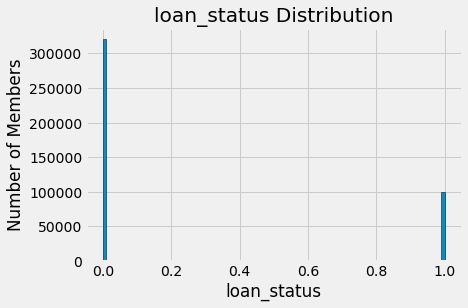

In [24]:
#Exploratory Data Analysis - POST Modeling
for i in df_agg.select_dtypes(include=['object']).columns:
    df_agg.drop(labels=i, axis=1, inplace=True)

#Single Variable Plot

figsize=(8, 8)

# Histogram of the column - loan_status
plt.style.use('fivethirtyeight')
plt.hist(df_agg['loan_status'], bins = 100, edgecolor = 'k')
plt.xlabel('loan_status') 
plt.ylabel('Number of Members');
plt.title('loan_status Distribution')

In [25]:
df_agg.shape

(421196, 24)

In [26]:
#Correlations between Features and Target

#Find all correlations and sort
correlations_df = df_agg.corr()['loan_status'].sort_values()

#Print the most negative correlations
print(correlations_df.head(15), '\n')

#Print the most positive correlations
print(correlations_df.tail(15))

member_id                    -0.491792
dti                          -0.131372
funded_amnt_inv              -0.107033
funded_amnt                  -0.102702
loan_amnt                    -0.100810
open_acc                     -0.067076
recoveries                   -0.062137
pub_rec                      -0.047581
delinq_2yrs                  -0.047094
revol_util                   -0.046795
revol_bal                    -0.043415
collection_recovery_fee      -0.042931
collections_12_mths_ex_med   -0.034023
total_rev_hi_lim             -0.020212
acc_now_delinq               -0.015418
Name: loan_status, dtype: float64 

revol_util                   -0.046795
revol_bal                    -0.043415
collection_recovery_fee      -0.042931
collections_12_mths_ex_med   -0.034023
total_rev_hi_lim             -0.020212
acc_now_delinq               -0.015418
annual_inc                   -0.013819
tot_coll_amt                 -0.011773
total_rec_late_fee           -0.005358
total_acc                   

In [77]:
'''for i in df_agg.columns:
    if len(set(df_agg[i]))==1:
        df_agg.drop(labels=[i], axis=1, inplace=True)

#Find all correlations and sort 
correlations_df = df_agg.corr()['loan_status'].sort_values()

#Print the most negative correlations
print(correlations_df.head(15), '\n')

#Print the most positive correlations
print(correlations_df.tail(15))'''


"for i in df_agg.columns:\n    if len(set(df_agg[i]))==1:\n        df_agg.drop(labels=[i], axis=1, inplace=True)\n\n#Find all correlations and sort \ncorrelations_df = df_agg.corr()['loan_status'].sort_values()\n\n#Print the most negative correlations\nprint(correlations_df.head(15), '\n')\n\n#Print the most positive correlations\nprint(correlations_df.tail(15))"

# Feature Engineering and Selection

In [27]:
def remove_collinear_features(x, threshold):
    
    # Dont want to remove correlations between loan_status
    y = x['loan_status']
    x = x.drop(columns = ['loan_status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back to the data
    x['loan_status'] = y
               
    return x

In [28]:
#Remove the collinear features above a specified correlation coefficient
df_agg = remove_collinear_features(df_agg, 0.6);

In [29]:
df_agg.shape

(421196, 21)

In [30]:
df_agg.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'loan_status'],
      dtype='object')

# Split Into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split

#Separate out the features and targets
features = df_agg.drop(columns='loan_status')
targets = pd.DataFrame(df_agg['loan_status'])

#Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336956, 20)
(84240, 20)
(336956, 1)
(84240, 1)


In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [34]:
X_train

array([[ 0.78428454, -1.17383608, -1.17295787, ..., -0.06325534,
        -0.10570286, -0.89974012],
       [ 1.35794822, -0.4220472 , -0.42068615, ..., -0.06325534,
        -0.10570286, -0.91907373],
       [-0.60850047,  0.79147027,  0.79361072, ..., -0.06325534,
        -0.10570286,  1.35675429],
       ...,
       [ 0.24820489,  1.07561095,  1.07793389, ..., -0.06325534,
        -0.10570286,  2.04953536],
       [ 0.22535874, -0.77130345, -0.77016671, ..., -0.06325534,
        -0.10570286, -0.6603524 ],
       [-0.36496836,  2.25953043,  2.26261377, ..., -0.06325534,
        -0.10570286,  2.88025639]])

In [35]:
X_test

array([[ 0.27062447,  0.22318892,  0.22496438, ..., -0.06325534,
        -0.10570286, -0.69381029],
       [-1.00263507, -0.10830854, -0.10674598, ..., -0.06325534,
        -0.10570286, -0.02120196],
       [ 1.2393242 , -0.27405727, -0.27260117, ..., -0.06325534,
        -0.10570286,  0.48843341],
       ...,
       [-1.37102168,  0.01008341,  0.011722  , ..., -0.06325534,
        -0.07702282, -0.19525818],
       [-0.88508839,  0.01008341,  0.011722  , ..., -0.06325534,
        -0.10570286,  0.13234586],
       [ 0.25444021,  0.60204315,  0.60406194, ..., -0.06325534,
        -0.10570286, -0.47207792]])

# ML Models - Train, Test, and Evaluate

Predicted values: [0 0 0 ... 1 0 0]
First 100 predicted values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
k_fold :  0.8442259515605116
Confusion Matrix:  [[60740  3530]
 [ 9588 10382]]
Accuracy :  84.4278252611586
Report :                precision    recall  f1-score   support

           0       0.86      0.95      0.90     64270
           1       0.75      0.52      0.61     19970

    accuracy                           0.84     84240
   macro avg       0.80      0.73      0.76     84240
weighted avg       0.84      0.84      0.83     84240

ROC-AUC :  0.7324776413102617


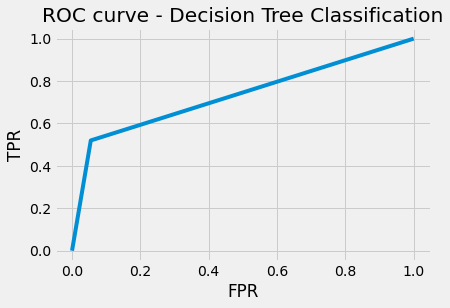

In [36]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

from matplotlib.pyplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
model = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

# Decision tree with entropy
#model = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("First 100 predicted values: ", y_pred[:100])

k_fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("k_fold : ", k_fold.mean())
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print("ROC-AUC : ", roc_auc_score(y_test, y_pred))

#print('cross val - AUC-ROC: ', cross_val_score(model, X_train, y_train, scoring="roc_auc", cv = 7))
#mean_score = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv = 7).mean()
#std_score = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv = 7).std()
#print('MEAN(cross val - AUC-ROC): ', mean_score)
#print('STD(cross val - AUC-ROC): ', std_score)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Decision Tree Classification')
plt.show()

Predicted values: [0 0 0 ... 0 1 0]
First 100 predicted values:  [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
k_fold_MAE :  0.8805838164320441
Confusion Matrix:  [[62023  1947]
 [ 8195 12075]]
Accuracy :  87.96058879392213
Report :                precision    recall  f1-score   support

           0       0.88      0.97      0.92     63970
           1       0.86      0.60      0.70     20270

    accuracy                           0.88     84240
   macro avg       0.87      0.78      0.81     84240
weighted avg       0.88      0.88      0.87     84240

ROC-AUC :  0.7826359004155176


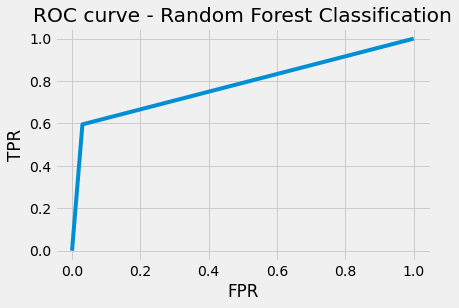

In [59]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

from matplotlib.pyplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Function to perform training with giniIndex.
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("First 100 predicted values: ", y_pred[:100])

k_fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("k_fold : ", k_fold.mean())
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print("ROC-AUC : ", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Random Forest Classification')
plt.show()

In [ ]:
#Not executing any extensive parameter tuning due to time constraints on computational time complexity.
'''
#Random Forest Classification - 2
#Using the Grid Search Method
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from matplotlib.pyplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Assign different values for the hyperparameter
params = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Function to perform training with giniIndex.
model = GridSearchCV(RandomForestClassifier(random_state=10), param_grid=params, 
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                scoring='f1')

model.fit(X_train, y_train)

print(clf.best_params_)

y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("First 100 predicted values: ", y_pred[:100])


k_fold_MAE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("k_fold_MAE : ", k_fold_MAE.mean())
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print("ROC-AUC : ", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Random Forest Classification')
plt.show()
'''

Predicted values: [0 0 0 ... 0 0 0]
First 100 predicted values:  [0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
k_fold_MAE :  0.8559182257002032
Confusion Matrix:  [[73872  6233]
 [ 9151 16043]]
Accuracy :  85.39017464553321
Report :                precision    recall  f1-score   support

           0       0.89      0.92      0.91     80105
           1       0.72      0.64      0.68     25194

    accuracy                           0.85    105299
   macro avg       0.80      0.78      0.79    105299
weighted avg       0.85      0.85      0.85    105299

ROC-AUC :  0.7794841120973154


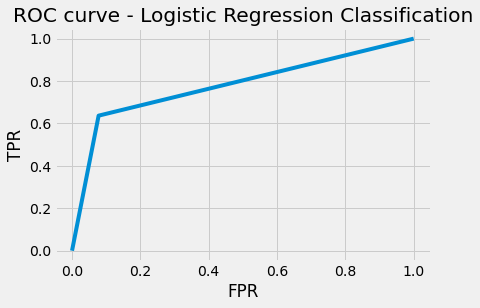

In [42]:
#Logistic Regression Classification
from sklearn.linear_model import LogisticRegression

from matplotlib.pyplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
model = LogisticRegression(random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("First 100 predicted values: ", y_pred[:100])

k_fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("k_fold : ", k_fold.mean())
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print("ROC-AUC : ", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Logistic Regression Classification')
plt.show()

D:\Installation_deck\AnaConDa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Installation_deck\AnaConDa\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Predicted values: [0 0 1 ... 0 0 0]
First 100 predicted values:  [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


D:\Installation_deck\AnaConDa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

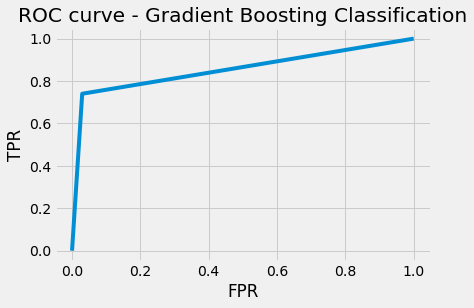

In [51]:
#Gradient Boosting Classification
from xgboost import XGBClassifier

from matplotlib.pyplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("First 100 predicted values: ", y_pred[:100])

k_fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("k_fold : ", k_fold.mean())
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print("ROC-AUC : ", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Gradient Boosting Classification')
plt.show()

#Finalizing the XGB Classification Model as the preferred model - due to its high score
final_model = model

In [ ]:
#Support Vector Machines Classification
from sklearn.svm import SVC

from matplotlib.pyplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("First 100 predicted values: ", y_pred[:100])

k_fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("k_fold : ", k_fold.mean())
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print("ROC-AUC : ", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Support Vector Machines Classification')
plt.show()

In [ ]:
#Finalizing the XGB Classification Model

# Apply model on the Real Test Dataset

In [52]:
import pickle

pkl_filename = 'saved_model.pkl'

#Saving the model
with open(pkl_filename, 'wb') as file:
    pickle.dump(final_model, file)
    

In [72]:
#loading the model
import pickle

pkl_filename = 'saved_model.pkl'

with open(pkl_filename, 'rb') as file:
    pickled_model = pickle.load(file)
    
pickled_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
#pickled_model = final_model

In [73]:
real_test_df = pd.read_csv('test_indessa.csv')
len_real_test = len(real_test_df)
real_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

In [74]:
missing_values_table(real_test_df).head(50)

Your selected dataframe has 44 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
verification_status_joint,354745,99.9
desc,304770,85.9
mths_since_last_record,300021,84.5
mths_since_last_major_derog,266228,75.0
mths_since_last_delinq,181758,51.2
batch_enrolled,45599,12.8
tot_cur_bal,28272,8.0
tot_coll_amt,28272,8.0
total_rev_hi_lim,28272,8.0
emp_title,20629,5.8


In [75]:
#Drop all the columns that are dropped for the training dataset
d_list = ['member_id', 'loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

real_test_df = real_test_df.drop(real_test_df.columns.difference(d_list), axis=1)

In [76]:
missing_values_table(real_test_df).head(50)

Your selected dataframe has 20 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
tot_coll_amt,28272,8.0
tot_cur_bal,28272,8.0
revol_util,215,0.1
collections_12_mths_ex_med,50,0.0
delinq_2yrs,13,0.0
inq_last_6mths,13,0.0
open_acc,13,0.0
pub_rec,13,0.0
acc_now_delinq,13,0.0
annual_inc,1,0.0


In [94]:
real_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   member_id                   354951 non-null  int64  
 1   loan_amnt                   354951 non-null  int64  
 2   funded_amnt                 354951 non-null  int64  
 3   int_rate                    354951 non-null  float64
 4   annual_inc                  354950 non-null  float64
 5   dti                         354951 non-null  float64
 6   delinq_2yrs                 354938 non-null  float64
 7   inq_last_6mths              354938 non-null  float64
 8   open_acc                    354938 non-null  float64
 9   pub_rec                     354938 non-null  float64
 10  revol_bal                   354951 non-null  int64  
 11  revol_util                  354736 non-null  float64
 12  total_rec_int               354951 non-null  float64
 13  total_rec_late

In [95]:
real_test_df_split_1 = real_test_df[:100000]
real_test_df_split_2 = real_test_df[100000:200000]
real_test_df_split_3 = real_test_df[200000:300000]
real_test_df_split_4 = real_test_df[300000:]

In [96]:
print(real_test_df_split_1.shape)
print(real_test_df_split_2.shape)
print(real_test_df_split_3.shape)
print(real_test_df_split_4.shape)

(100000, 20)
(100000, 20)
(100000, 20)
(54951, 20)


In [97]:
import csv

with open('final_submission.csv', 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['member_id', 'loan_status'])
    csv_file.close()
    
with open('final_submission.csv', 'a', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    for i in range(0, len(real_test_df_split_1)):
        #try: 
        fv = np.array(real_test_df_split_1.iloc[i]).reshape((1,-1))
        loan_status_predicted = pickled_model.predict(fv)
        #except: 
        #    loan_status_predicted = 2
        csv_writer.writerow([real_test_df_split_1['member_id'].iloc[i], loan_status_predicted[0]])

    csv_file.close()


with open('final_submission.csv', 'a', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    for i in range(0, len(real_test_df_split_2)):
        #try: 
        fv = np.array(real_test_df_split_2.iloc[i]).reshape((1,-1))
        loan_status_predicted = pickled_model.predict(fv)
        #except: 
        #    loan_status_predicted = 2
        csv_writer.writerow([real_test_df_split_2['member_id'].iloc[i], loan_status_predicted[0]])

    csv_file.close()
    
with open('final_submission.csv', 'a', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    for i in range(0, len(real_test_df_split_3)):
        #try: 
        fv = np.array(real_test_df_split_3.iloc[i]).reshape((1,-1))
        loan_status_predicted = pickled_model.predict(fv)
        #except: 
        #    loan_status_predicted = 2
        csv_writer.writerow([real_test_df_split_3['member_id'].iloc[i], loan_status_predicted[0]])

    csv_file.close()
    
    
with open('final_submission.csv', 'a', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    for i in range(0, len(real_test_df_split_4)):
        #try: 
        fv = np.array(real_test_df_split_4.iloc[i]).reshape((1,-1))
        loan_status_predicted = pickled_model.predict(fv)
        #except: 
        #    loan_status_predicted = 2
        csv_writer.writerow([real_test_df_split_4['member_id'].iloc[i], loan_status_predicted[0]])

    csv_file.close()

Important Note:
    
    This the end for a base model, that is trained on the given dataset. 
    

__

    In real-time, there will much structured and enhanced versions at every phase.
    
    Also here, a combined train_indessa.csv and test_indessa.csv EDA is missing. Yet, it will be done in real-time work to ensure the importance of different categorical columns and values. 
    

Real-time workflow enhancements: 
    
    Choice of Libraries - Will go with a combination of different libs. Ex: A combination of Modin and Pandas for large data handling. 
    
    EDA - In-depth Visualizations using Tableau, pandas_profiling. 
    
    Data Pre-processing - (with 5 sub-stages), Feature Selection and Engineering - w.r.t. Correlation, Dependency, etc. and in-relevance as observed by the expertise in the field of Banking. 
    The categorical columns are not used much in the current model. They can be considered with meticulous observation and Encoding to make use of them. 
    
    Data Modeling - Reflective - In a way to preserve details for future use. 
    
    Model Enahncement - precisionate fine-tuning to the business-case (also, includes a try-on with ANN). 
    
    Model Evaluation - Consideration of all major evaluation metrics like Confusion Matrix, ROC-AUC, KS Static, Cross-Validation methods etc.
    
    Real-time Testing and model enhancement

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------